# Case 1 - Heart Disease Classification
Mikko Peltola
<br>
Last edited: 11.2.2018
<br>
Cognitive Systems for Health Technology Applications
<br>
<a href="https://www.metropolia.fi/en">Helsinki Metropolia University of Applied Sciences</a>

---
## 1. Objectives
The primary objective of this assignment to create a deep neural network capable of predicting heart disease in a patient when given a number measured health related data.
<br><br>
The secondary is to familiarize myself with the tools at disposal for the task. I aim to use Pandas, NumPy and Scikit-learn to preprocess the data into a fitting format, use the Keras framework on top of TensorFlow for creating the neural network, and finally displaying the results using the matplotlib library.

---
## 2. Required libraries

In [59]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import to_categorical
from keras import regularizers
from timeit import default_timer as timer

#### Version information

In [60]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("sklearn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("keras:", keras.__version__)

numpy: 1.13.3
pandas: 0.22.0
sklearn: 0.19.1
matplotlib: 2.1.2
seaborn: 0.8.1
keras: 2.0.9


## 3. Data description and preprocessing
The data sets used in this study are as follows:
- Cleveland data set (Cleveland Clinic Foundation (cleveland.data))
- Hungarian data set (Hungarian Institute of Cardiology, Budapest (hungarian.data))
- Long Beach VA data set (V.A. Medical Center, Long Beach, CA (long-beach-va.data))
- Switzerland data set (University Hospital, Zurich, Switzerland (switzerland.data))

**Source Information:**
- Creators: 
    - Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    - V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
- Date: July, 1988

**Variables:**   
14 variables are to be extracted of the 76 available:
- Sex ('sex')
- Age ('age')
- Chest pain type ('cp')
    - 1: Typical angina
    - 2: Atypical angina
    - 3: Non-anginal pain
    - 4: Asymptomatic
- Resting blood pressure (mm/Hg) on admission ('trestbps')
- Serum cholesterol (mg/dl) ('chol')
- Fasting blood sugar ('fbs')
    - 1: Over 120mg/dl
    - 0: Under 120mg/dl
- Resting electrocardiographic results ('restecg')
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Probable or definite left ventricular hypertrophy
- Maximum heart rate achieved ('thalach')
- Exercise induced angina ('exang')
    - 1: Yes
    - 0: No
- ST depression induced by exercise relative to rest ('oldpeak')
- Slope of the peak exercise ST segment ('slope')
    - 1: Upsloping
    - 2: Flat
    - 3: Downsloping
- Number of major vessels colored by fluoroscopy ('ca')
- thal ('thal')
    - 3: Normal
    - 6: Fixed defect
    - 7: Reversable defect
- Diagnosis of heart disease (angiographic disease status) (num)
    - Value 0: < 50% diameter narrowing
    - Value 1+: > 50% diameter narrowing

### 3.1 Defining column names
Column names for our upcoming dataframe, which are named after the variables we are interested in studying.

In [61]:
column_names = ['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'num', 'oldpeak', 'restacg', 'sex', 'slope', 'thal', 'thalach', 'trestbps']

### 3.2 Defining function for processing the raw data
The function loads up the data into a temporary Pandas dataframe. After this a Pandas series is created for each variable we are interested in extracting from the raw dataframe. A loop then iterates over the dataframe, which snatches relevant information from every row along the way into its respective Pandas series. Finally a new dataframe is created, where all of the seris are merged, the index column is dropped and all values of -9 are converted to NaNs, as this is how empty values were encoded in the raw data. The newly created dataframe is then returned.

In [62]:
def parse_raw(infile, cut_end=0):
	format_columns = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7"]
	df_raw = pd.read_csv(infile, sep=" ", names=format_columns)
	df = pd.DataFrame(columns=column_names)
	
	if(cut_end == 0):
		df_size = df_raw.shape[0] // 10
	else:
		df_size = cut_end // 10
	
	age = pd.Series(np.zeros((df_size)), dtype="int32")
	sex = pd.Series(np.zeros((df_size)), dtype="int32")
	cp = pd.Series(np.zeros((df_size)), dtype="int32")
	trestbps = pd.Series(np.zeros((df_size)), dtype="int32")
	chol = pd.Series(np.zeros((df_size)), dtype="int32")
	fbs = pd.Series(np.zeros((df_size)), dtype="int32")
	restecg = pd.Series(np.zeros((df_size)), dtype="int32")
	thalach = pd.Series(np.zeros((df_size)), dtype="int32")
	exang = pd.Series(np.zeros((df_size)), dtype="int32")
	oldpeak = pd.Series(np.zeros((df_size)), dtype="int32")
	slope = pd.Series(np.zeros((df_size)), dtype="int32")
	ca = pd.Series(np.zeros((df_size)), dtype="int32")
	thal = pd.Series(np.zeros((df_size)), dtype="int32")
	num = pd.Series(np.zeros((df_size)), dtype="int32")
	
	for index, row in df_raw.iterrows():
		if(cut_end != 0):
			if(index == cut_end):
				break;
		
		m = index % 10
		if(m == 0):
			age[index // 10] = row[2]
			sex[index // 10] = row[3]

		elif(m == 1):
			cp[index // 10] = row[1]
			trestbps[index // 10] = row[2]
			chol[index // 10] = row[4]
			
		elif(m == 2):
			fbs[index // 10] = row[0]
			restecg[index // 10] = row[3]
			
		elif(m == 4):
			thalach[index // 10] = row[0]
			exang[index // 10] = row[6]
			
		elif(m == 5):
			oldpeak[index // 10] = row[0]
			slope[index // 10] = row[1]
			ca[index // 10] = row[4]
		elif(m == 6):
			thal[index // 10] = row[3]
			
		elif(m == 7):
			num[index // 10] = row[2]
		
	df = pd.DataFrame(dict(age = age, sex = sex, cp = cp, trestbps = trestbps, chol = chol, fbs = fbs, restacg = restecg, thalach = thalach, exang = exang, oldpeak = oldpeak, slope = slope, ca = ca, thal = thal, num = num)).reset_index()
	df = df.drop("index", axis=1)
	df = df.replace(-9, np.nan)
	return df

### 3.3 Loading data

#### 3.3.1 Loading and parsing of data
All four data sets are processed to a suitable form using the previously defined parse_raw(). The last 21 samples of the Cleveland data were discarded due to data corruption. The cut_end argument passed to parse_raw() defines the row cutoff point for the file.

In [63]:
df_cl = parse_raw("C:\\Users\\micromikko\\AnacondaProjects\\data\\case1_data\\cleveland.data", cut_end=2820)
df_hu = parse_raw("C:\\Users\\micromikko\\AnacondaProjects\\data\\case1_data\\hungarian.data")
df_lbv = parse_raw("C:\\Users\\micromikko\\AnacondaProjects\\data\\case1_data\\long-beach-va.data")
df_sw = parse_raw("C:\\Users\\micromikko\\AnacondaProjects\\data\\case1_data\\switzerland.data")

#### 3.3.2 Entry counts in data frames

In [64]:
print("Entries in Clevelend data:\t", len(df_cl))
print("Entries in Hungarian data:\t", len(df_hu))
print("Entries in Long Beach VA data:\t", len(df_lbv))
print("Entries in Switzerland data:\t", len(df_sw))

Entries in Clevelend data:	 282
Entries in Hungarian data:	 294
Entries in Long Beach VA data:	 200
Entries in Switzerland data:	 123


#### 3.3.3 Combining dataframes
All four data frames are combined into one and confirmed the sums match.

In [65]:
frames = [df_sw, df_hu, df_cl, df_lbv]
df = pd.concat(frames, axis=0, ignore_index=True)

if(len(df_cl) + len(df_hu) + len(df_lbv) + len(df_sw) == len(df)):
	print("Number of entries in combined dataframe matches the separate data frame entry counts.\nEntries in the dataset: " + str(len(df.index)))
else:
	print("Number of entries in combined dataframe does not match the separate data frame entry counts.")

Number of entries in combined dataframe matches the separate data frame entry counts.
Entries in the dataset: 899


### 3.4 Examining our data

#### 3.4.1 Sample of 10 entries
This step is to check if the data seems to be in the rough format.

In [66]:
df.head(10)

,age,ca,chol,cp,exang,fbs,num,oldpeak,restacg,sex,slope,thal,thalach,trestbps
0,65,NaN,0.0,4,1.0,0.0,1,0,0.0,1,2.0,7.0,93.0,115.0
1,32,NaN,0.0,1,0.0,NaN,1,0,0.0,1,1.0,NaN,127.0,95.0
2,61,NaN,0.0,4,1.0,NaN,1,1,0.0,1,1.0,NaN,110.0,105.0
3,50,NaN,0.0,4,1.0,NaN,1,0,0.0,1,2.0,NaN,139.0,145.0
4,57,1.0,0.0,4,1.0,NaN,3,1,1.0,1,1.0,NaN,131.0,110.0
5,51,NaN,0.0,4,0.0,NaN,4,0,0.0,1,2.0,NaN,92.0,110.0
6,47,NaN,0.0,4,0.0,NaN,2,2,1.0,1,1.0,NaN,149.0,110.0
7,60,NaN,0.0,4,0.0,NaN,1,0,0.0,1,2.0,NaN,149.0,160.0
8,55,NaN,0.0,2,0.0,NaN,0,0,1.0,1,1.0,NaN,150.0,140.0
9,53,NaN,0.0,4,0.0,NaN,4,1,0.0,1,1.0,NaN,120.0,125.0


#### 3.4.2 Basic statistical characteristics
We check the basic statistical characteristics to find any possible weird occurrences in our data set.
<br><br>
As it turns out, the min value for quite a few of our variables seems to be zero, which might indicate that they are missing. The mean and max values seem to be alright for now.

In [67]:
df.describe()

,age,ca,chol,cp,exang,fbs,num,restacg,sex,slope,thal,thalach,trestbps
count,899.000000,291.000000,869.000000,899.000000,844.000000,809.000000,899.000000,897.000000,899.000000,591.000000,422.000000,844.000000,840.000000
mean,53.480534,0.697595,198.759494,3.253615,0.390995,0.166873,1.129032,0.603122,0.790879,1.766497,5.018957,137.298578,132.101190
std,9.435894,1.052728,111.834415,0.928499,0.488263,0.373093,1.259720,0.803669,0.406908,0.621339,1.949388,25.965959,19.151127
min,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000
25%,47.000000,0.000000,175.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,120.000000,120.000000
50%,54.000000,0.000000,224.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,6.000000,140.000000,130.000000
75%,60.000000,1.000000,269.000000,4.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,7.000000,157.000000,140.000000
max,77.000000,9.000000,603.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000,7.000000,202.000000,200.000000


#### 3.4.3 A more in-depth look at our missing values
Due to some some funny elements in the statistical description of our data set, we want to look further into the missing values.
<br><br>
The find_missing_by_column() function checks the sum of missing values for every column. It also displays the same information as a percentage.
<br><br>
It is important to note that our target, "num", contains no empty entries, which means we could theoretically use all and any rows if we wanted to.

In [68]:
def find_missing_by_column(dataframe, colnames):
	print("Missing values\n\nCol name\t #\t\t %\n----------------------------------------")
	i = 0
	for column in dataframe:
		if len(str(colnames[i])) < 7:
			print(colnames[i], "\t\t", dataframe[column].isnull().sum(), "\t\t", round( (dataframe[column].isnull().sum()) / dataframe[column].size * 100, 2) )
		else:
			print(colnames[i], "\t", dataframe[column].isnull().sum(), "\t\t", round( (dataframe[column].isnull().sum()) / dataframe[column].size * 100, 2) )
		i += 1

In [69]:
find_missing_by_column(df, column_names)

Missing values

Col name	 #		 %
----------------------------------------
age 		 0 		 0.0
ca 		 608 		 67.63
chol 		 30 		 3.34
cp 		 0 		 0.0
exang 		 55 		 6.12
fbs 		 90 		 10.01
num 		 0 		 0.0
oldpeak 	 62 		 6.9
restacg 	 2 		 0.22
sex 		 0 		 0.0
slope 		 308 		 34.26
thal 		 477 		 53.06
thalach 	 55 		 6.12
trestbps 	 59 		 6.56


#### 3.4.4 What if we dropped all rows with missing values?
It turns out that if we were to discard all rows with missing values, we would lose almost 70% of our data, which is rather drastic. I decided against this route for this study.

In [70]:
print(df.dropna().count())

age         280
ca          280
chol        280
cp          280
exang       280
fbs         280
num         280
oldpeak     280
restacg     280
sex         280
slope       280
thal        280
thalach     280
trestbps    280
dtype: int64


### 3.5 Dropping out irrelevant columns
As columns "ca" and "thal" have over 53% and 67% of their values missing, I rule them as hindering columns and drop them out entirely. After some deliberation, "slope" was re-added after I had already dropped it for having over a third of its values missing. However, in the end I decided that the missing values were acceptable in this case.
<br><br>
 After our cuts, a maximum of 35% of any column's values are missing, which we deem acceptable.
<br><br>
We are also sure to remove these items from the column_names list.

In [71]:
column_names.remove("ca")
column_names.remove("thal")
#column_names.remove("slope")

df.drop("ca", axis=1, inplace=True)
df.drop("thal", axis=1, inplace=True)
#df.drop("slope", axis=1, inplace=True)

In [72]:
print(list(df))

['age', 'chol', 'cp', 'exang', 'fbs', 'num', 'oldpeak', 'restacg', 'sex', 'slope', 'thalach', 'trestbps']


##### After removing these three columns, our NaN table looks as follows

In [73]:
find_missing_by_column(df, column_names)

Missing values

Col name	 #		 %
----------------------------------------
age 		 0 		 0.0
chol 		 30 		 3.34
cp 		 0 		 0.0
exang 		 55 		 6.12
fbs 		 90 		 10.01
num 		 0 		 0.0
oldpeak 	 62 		 6.9
restacg 	 2 		 0.22
sex 		 0 		 0.0
slope 		 308 		 34.26
thalach 	 55 		 6.12
trestbps 	 59 		 6.56


### 3.6 Further examination
We will now examine the data via histograms and correlation matrices to find out any useful preliminary information.

#### 3.6.1 Correlation matrix

In [74]:
df.corr()

,age,chol,cp,exang,fbs,num,restacg,sex,slope,thalach,trestbps
age,1.000000,-0.089320,0.160080,0.203378,0.232141,0.277798,0.208106,0.063616,0.143725,-0.367712,0.240246
chol,-0.089320,1.000000,-0.130739,-0.031346,0.026925,-0.128412,0.117848,-0.196124,-0.063350,0.236630,0.095424
cp,0.160080,-0.130739,1.000000,0.413698,0.031106,0.397565,0.028318,0.178850,0.203397,-0.343858,0.015484
exang,0.203378,-0.031346,0.413698,1.000000,0.029868,0.438906,0.032473,0.197555,0.327172,-0.354568,0.153194
fbs,0.232141,0.026925,0.031106,0.029868,1.000000,0.124605,0.127878,0.092508,0.077264,-0.045129,0.148366
num,0.277798,-0.128412,0.397565,0.438906,0.124605,1.000000,0.080755,0.265602,0.322021,-0.391915,0.161678
restacg,0.208106,0.117848,0.028318,0.032473,0.127878,0.080755,1.000000,-0.012321,-0.010269,0.057040,0.089740
sex,0.063616,-0.196124,0.178850,0.197555,0.092508,0.265602,-0.012321,1.000000,0.128366,-0.183561,0.004917
slope,0.143725,-0.063350,0.203397,0.327172,0.077264,0.322021,-0.010269,0.128366,1.000000,-0.358420,0.066278
thalach,-0.367712,0.236630,-0.343858,-0.354568,-0.045129,-0.391915,0.057040,-0.183561,-0.358420,1.000000,-0.102643


#### 3.6.2 Correlation matrix visualised
The heatmap of our correlation matrix is much easier to interpret at a glance than the numerical matrix. From this we can deduce that especially age, chest pain and excercise induced angina seem to positively correlate with heart disease, while low cholesterol negatively correlates with it. Also, since the maximum heart rate (thalach) positively correlates so strongly with age, it is expected to correlate negatively with heart disease. Younger people have higher maximum heart rates and are less prone to heart disease.

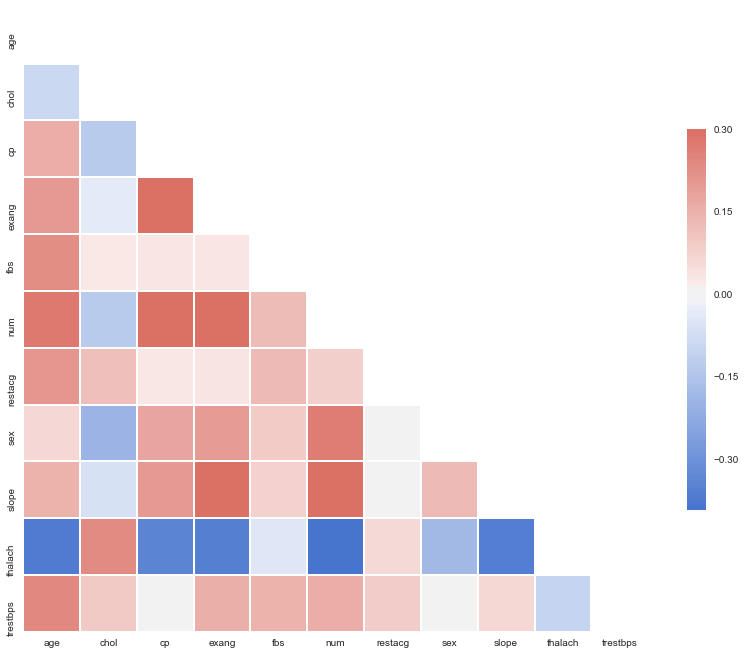

In [75]:
correlation = df.corr()
sns.set(style="white")

whitemask = np.zeros_like(correlation, dtype=np.bool)
whitemask[np.triu_indices_from(whitemask)] = True

f, ax = plt.subplots(figsize=(14, 14))

cmap = sns.diverging_palette(256, 15, as_cmap=True)

sns.heatmap(correlation, mask=whitemask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5})

#### 3.6.3 Histograms
Histograms can give a pretty good idea of the frequency distribution of a given data set, which is why we want to at least glance at it.
<br><br>
Quick observations:
- age, chol (with outliers), thalach and trestbps have a rough gaussian distribution
- most people in the data set do not suffer from chest pains
- most people in the data set do not suffer from heart disease
- most people in the data set are male
- most people in the data set have lower than 120 mg/dl fasting blood sugar
- most people in the data set do not have excercise induced angina
- most people in the data set have normal electrocardiographic results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A30A24DFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A30B837518>]], dtype=object)

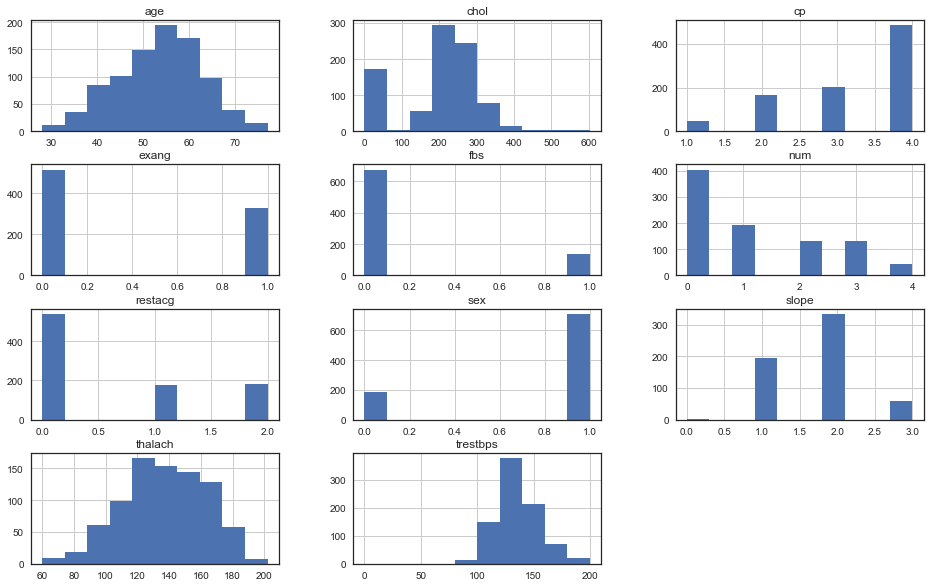

In [76]:
df.hist(figsize=(16, 10))

### 3.7 Filling in NaN values with column means
NaN values will be filled with column means. Filling our NaNs with zeroes is not an option in most of our variables, as some of them are binary or ordinally scaled. We are cheating slightly, since we are filling lower scale variables with means, but it tends to provide reasonable results with sample sizes such as the ones we are using.
<br><br>
As an interesting note, for some reason the fillna() function worked normally on every other variable except "oldpeak". I still do not know the reason for this, as it was encoded exactly as the other variables. Since the provided function did not work, I replaced all NaNs with the value -666, calculated the mean for all of the column's values except these, and finally applied this mean to the stubborn NaN values. This is exactly what the ready made function does.

In [77]:
df.fillna(df.mean(), inplace=True)
df["oldpeak"].replace(np.nan, -666, inplace=True)

sum = 0
count = 0
for i in range(len(df["oldpeak"])):
	if i != -666:
		sum += i
		count += 1
mean = sum / count

df["oldpeak"].replace(-666, mean, inplace=True)

find_missing_by_column(df, column_names)
print("\ndf count:")
df.count()

Missing values

Col name	 #		 %
----------------------------------------
age 		 0 		 0.0
chol 		 0 		 0.0
cp 		 0 		 0.0
exang 		 0 		 0.0
fbs 		 0 		 0.0
num 		 0 		 0.0
oldpeak 	 0 		 0.0
restacg 	 0 		 0.0
sex 		 0 		 0.0
slope 		 0 		 0.0
thalach 	 0 		 0.0
trestbps 	 0 		 0.0

df count:


age         899
chol        899
cp          899
exang       899
fbs         899
num         899
oldpeak     899
restacg     899
sex         899
slope       899
thalach     899
trestbps    899
dtype: int64

### 3.8 Pre-modeling transforms

#### 3.8.1 Dividing our dataset into data and target dataframes
The data is split into data and target values.

In [78]:
df_target = (df["num"] > 0).values
df_data = df.drop("num", axis=1)
df_data = df_data.values

print("data shape:\t", df_data.shape)
print("target shape:\t", df_target.shape)

data shape:	 (899, 11)
target shape:	 (899,)


#### 3.8.2 Shuffling x and y
Our newly formed x and y (data and target) are shuffled with sklearns shuffle() function.

In [79]:
x, y = shuffle(df_data, df_target)

#### 3.9.3 Scaling
The sklearn StandardScaler is used to scale our data. The shape of the data is checked just in case.

In [80]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (899, 11)
y.shape: (899,)


W:\Programs\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### 3.9.4 Final split
Finally our dataset is split into training and validation sets with a ratio of 65/35. Note, that this split is only valid for the single model test. A kfold-validated model will be contructed later on.

In [81]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.35)

print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_val.shape:", x_val.shape)
print("y_val.shape:", y_val.shape)

x_train.shape: (584, 11)
y_train.shape: (584,)
x_val.shape: (315, 11)
y_val.shape: (315,)


## 4 Singleshot model

### 4.1 Defining and compiling our model
A network with 3 hidden layers is chosen for the task at hand. The layer depths are kept minimal to keep the model's capacity from growing too large, while l2 regularization and mild dropout layers are employed to fight overfitting. Relu is our activation function of choice for all layers, except of course the output layer, which uses the sigmoid function to produce a probability value (something between 0 and 1). Naturally, the binary cross-entropy loss function was chosen for a single-labeled binary class task. RMSProp was chosen simply because it has proven to provide good results in other experiments.

In [87]:
cycles = 100

model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01), input_dim = 11))
keras.layers.Dropout(0.2)
model.add(keras.layers.Dense(4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
keras.layers.Dropout(0.2)
model.add(keras.layers.Dense(2, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.001)))
keras.layers.Dropout(0.1)
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

### 4.2 Training the model
The model is trained for 100 epochs with a batch size of 8.

In [88]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=cycles, batch_size=8, verbose=1)

Train on 720 samples, validate on 179 samples
Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.8513 - acc: 0.4444 - val_loss: 0.8295 - val_acc: 0.4134
Epoch 2/100
720/720 [==============================] - 0s 206us/step - loss: 0.8027 - acc: 0.5181 - val_loss: 0.7854 - val_acc: 0.5084
Epoch 3/100
720/720 [==============================] - 0s 211us/step - loss: 0.7644 - acc: 0.5417 - val_loss: 0.7466 - val_acc: 0.5698
Epoch 4/100
720/720 [==============================] - 0s 217us/step - loss: 0.7297 - acc: 0.5486 - val_loss: 0.7093 - val_acc: 0.5587
Epoch 5/100
720/720 [==============================] - 0s 211us/step - loss: 0.6970 - acc: 0.5500 - val_loss: 0.6734 - val_acc: 0.5587
Epoch 6/100
720/720 [==============================] - 0s 212us/step - loss: 0.6646 - acc: 0.5514 - val_loss: 0.6336 - val_acc: 0.5866
Epoch 7/100
720/720 [==============================] - 0s 244us/step - loss: 0.6273 - acc: 0.7361 - val_loss: 0.5901 - val_acc: 0.7989
Epoch 8/100

Epoch 61/100
720/720 [==============================] - 0s 199us/step - loss: 0.4529 - acc: 0.8097 - val_loss: 0.4354 - val_acc: 0.8324
Epoch 62/100
720/720 [==============================] - 0s 244us/step - loss: 0.4526 - acc: 0.8042 - val_loss: 0.4322 - val_acc: 0.8324
Epoch 63/100
720/720 [==============================] - 0s 300us/step - loss: 0.4521 - acc: 0.8139 - val_loss: 0.4283 - val_acc: 0.8268
Epoch 64/100
720/720 [==============================] - 0s 224us/step - loss: 0.4518 - acc: 0.8111 - val_loss: 0.4325 - val_acc: 0.8268
Epoch 65/100
720/720 [==============================] - 0s 236us/step - loss: 0.4507 - acc: 0.8097 - val_loss: 0.4308 - val_acc: 0.8324
Epoch 66/100
720/720 [==============================] - 0s 228us/step - loss: 0.4506 - acc: 0.8111 - val_loss: 0.4314 - val_acc: 0.8324
Epoch 67/100
720/720 [==============================] - 0s 238us/step - loss: 0.4508 - acc: 0.8125 - val_loss: 0.4310 - val_acc: 0.8268
Epoch 68/100
720/720 [==========================

##### The model is saved to disk for later use

In [100]:
model.save("C:\\Users\\micromikko\\AnacondaProjects\\models\\heart-disease-single.h5")

### 4.3 Evaluation
The evaluation metrics are calculated for the validation set and the results are plotted.
<br><br>
For our small sample size, the model is surprisingly accurate, reaching a score of 82.68% on the validation set. After roughly 10 epochs, the training started to give increasingly diminishing returns, but the model's hyper-parameters and the techniques to fight overfitting were chosed fairly well, as can be seen from the second graph. A fine line between over and underfitting seems to be reached.

In [89]:
eval = model.evaluate(x_val, y_val)
print(model.metrics_names)
print(eval)

179/179 [==============================] - 0s 67us/step
['loss', 'acc']
[0.43359979604209603, 0.8268156437900479]


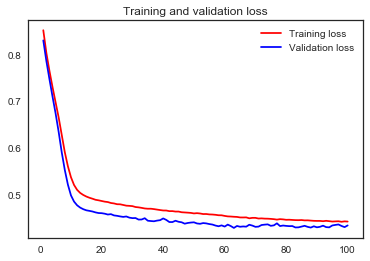

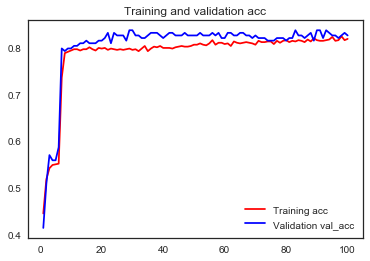

In [90]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation val_acc')
plt.title('Training and validation acc')
plt.legend()


plt.show()

## 5 K-folded model

### 5.1 Defining and training our k-folded model
Since our data set is fairly limited in size, k-folding will be employed to "stretch" to gain a little more mileage from the data set. It will proceed as follows:
<br>
1. Split data into validation and training sets for the loop based on the loop counter.
2. The creation of a new model each time the loop runs will ensure that no residual values are left in the network.
3. The validation set's loss and accuracy are collected into a list for further use.
<br><br>

A k of 3 is selected since this way roughly 66% of the data is used for training and 33% is used for validation in each fold. After experimentation a model of the same capacity as with the single shot model seems to work pretty well.

In [95]:
k = 3
val_size = len(x) // k;

all_loss_histories = []
all_acc_histories = []

all_val_loss_histories = []
all_val_acc_histories = []

evaluation = []

for i in range(k):
	print("processing fold #", i, "...")
	
	x_val = x[i * val_size: (i+1) * val_size]
	y_val = y[i * val_size: (i+1) * val_size]

	x_train = np.concatenate([x[: i * val_size], x[(i+1) * val_size :]])
	y_train = np.concatenate([y[: i * val_size], y[(i+1) * val_size :]])

	model = keras.models.Sequential()
	model.add(keras.layers.Dense(8, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01), input_dim = 11))
	keras.layers.Dropout(0.1)
	model.add(keras.layers.Dense(3, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
	keras.layers.Dropout(0.2)
	model.add(keras.layers.Dense(2, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
	keras.layers.Dropout(0.4)
	model.add(keras.layers.Dense(1, activation = 'sigmoid'))

	model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
	hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=cycles, batch_size=8, verbose=0)
	
	loss = hist.history['loss']
	val_loss = hist.history['val_loss']
	acc = hist.history['acc']
	val_acc = hist.history['val_acc']
	epochs = range(1, len(acc) + 1)
	
	all_loss_histories.append(loss)
	all_acc_histories.append(acc)
	
	all_val_loss_histories.append(val_loss)
	all_val_acc_histories.append(val_acc)
	
	evaluation.append(model.evaluate(x_val, y_val))
	
	print("fold #", i, "complete!\n")


processing fold # 0 ...
299/299 [==============================] - 0s 72us/step
fold # 0 complete!

processing fold # 1 ...
299/299 [==============================] - 0s 40us/step
fold # 1 complete!

processing fold # 2 ...
299/299 [==============================] - 0s 57us/step
fold # 2 complete!



##### The model is saved to disk for later use

In [99]:
model.save("C:\\Users\\micromikko\\AnacondaProjects\\models\\heart-disease-kfold.h5")

### 5.2 Evaluation
The results of our k-folded model are to be considered more trustworthy than the single shot model's, since it iterates over the data set several times and averages its results. The 79.82% accuracy is not far from our previous score, and stands on its own right as a pretty decent accuracy rating. Examining the plots reveal that the model does seem to start to increasingly overfit to the training data after roughly 60 epochs. Several different iterations of the model were tried, but about 80% accuracy was the best score achieved with any version. More aggressive dropouts, regularizations and smaller 

In [96]:
average_eval = [np.mean([x[i] for x in evaluation]) for i in range(2)]
print(average_eval)
print(model.metrics_names)

[0.49433076969755935, 0.79821627654359484]
['loss', 'acc']


In [97]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(cycles)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(cycles)]

average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(cycles)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(cycles)]

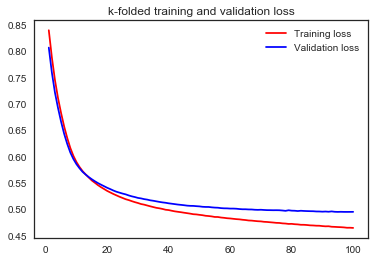

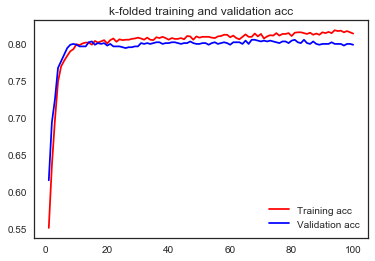

In [98]:
plt.figure()
plt.plot(epochs, average_loss_history, 'r', label='Training loss')
plt.plot(epochs, average_val_loss_history, 'b', label='Validation loss')
plt.title('k-folded training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, average_acc_history, 'r', label='Training acc')
plt.plot(epochs, average_val_acc_history, 'b', label='Validation acc')
plt.title('k-folded training and validation acc')
plt.legend()


plt.show()

## 6 Conclusions
I would say that the primary objective of this assignment, which was to create a deep neural network capable of predicting heart disease in a patient, was achieved surprisingly well. With both models reaching a roughly 80% detection accuracy, the models can be said to be improvements over 50/50 random guessing without a doubt, with a 60% relative inrease to arbitrary guessing. The model could be used as a quick and easy-to-use guideline to suggest whether or not a patient might be at risk of heart disease.
<br><br>
The secondary goal of the case was to get to know the available tools better, which was also achieved. Even though I didn't employ but a few scikit-learn modules in this project, I am intrigued to dig deeper into their extensive libraries to find out what more there is to use. Pandas dataframe manipulation is still a pain and can feel somewhat counter-intuitive, but I think some improvement has been made in that department, too.